In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from collections import Counter
from imblearn.over_sampling import RandomOverSampler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import confusion_matrix

D:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
os.chdir("../../")

In [3]:
true_train_labels = pd.read_csv("data/processed/true_train_labels.csv")
true_test_labels = pd.read_csv("data/processed/true_test_labels.csv")
true_train_attributes = pd.read_csv("data/processed/true_train_attributes.csv")
true_test_attributes = pd.read_csv("data/processed/true_test_attributes.csv")
true_train_attributes_scaled = pd.read_csv("data/processed/true_train_attributes_scaled.csv")
true_test_attributes_scaled = pd.read_csv("data/processed/true_test_attributes_scaled.csv")
true_train_extra_attributes_scaled = pd.read_csv("data/processed/true_train_extra_attributes_scaled.csv")
true_test_extra_attributes_scaled = pd.read_csv("data/processed/true_test_extra_attributes_scaled.csv")
true_test_extra_attributes_scaled = pd.read_csv("data/processed/true_test_extra_attributes_scaled.csv")

train_tfidfmatrix = pickle.load(open("model/train_tfidfmatrix.pkl","rb"))
validation_tfidfmatrix = pickle.load(open("model/validation_tfidfmatrix.pkl","rb"))
tf_dict = pickle.load(open("model/tf_dictionary.pkl","rb"))
tf_dict = {v: k for k, v in tf_dict.items()}

## DECISION TREE

In [4]:
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
dt = DecisionTreeClassifier(random_state=0)
ros = RandomOverSampler()
scores = []
for name in classes:
    print("-----------------",name, "------------------")
    X_ros, y_ros = ros.fit_resample(true_train_attributes, true_train_labels[name])
    dt.fit(X_ros, y_ros)
    y_probs = dt.predict_proba(true_test_attributes)[:, 1]
    score =roc_auc_score(true_test_labels[name],y_probs)
    scores.append(score)
    print("Class",name, "roc_auc_score:",score)
print('Total roc_auc_score: {}'.format(np.mean(scores)))

----------------- toxic ------------------
Class toxic roc_auc_score: 0.7324135189745344
----------------- severe_toxic ------------------
Class severe_toxic roc_auc_score: 0.6404489026004845
----------------- obscene ------------------
Class obscene roc_auc_score: 0.7288238052062936
----------------- threat ------------------
Class threat roc_auc_score: 0.5779658411169951
----------------- insult ------------------
Class insult roc_auc_score: 0.7054707213993081
----------------- identity_hate ------------------
Class identity_hate roc_auc_score: 0.6008406832783275
Total roc_auc_score: 0.6643272454293239


### Tuning Word2vec

----------------- toxic ------------------


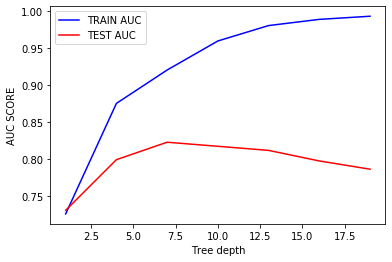

----------------- severe_toxic ------------------


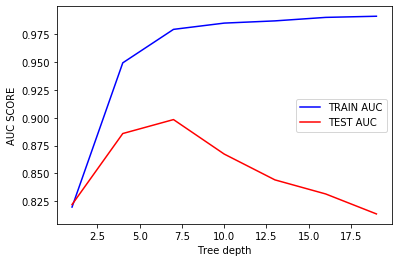

----------------- obscene ------------------


----------------- threat ------------------


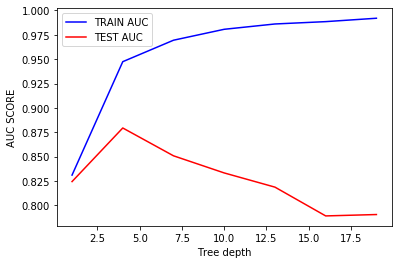

----------------- insult ------------------


----------------- identity_hate ------------------


In [5]:
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

max_depths = [1,4,7,10,13,16,19]
for name in classes:
    print("-----------------",name, "------------------")
    X_ros, y_ros = ros.fit_resample(true_train_attributes, true_train_labels[name])
    train_results = []
    test_results = []
    for max_depth in max_depths:
        dt = DecisionTreeClassifier(max_depth=max_depth)
        dt.fit(X_ros, y_ros)
        train_pred = dt.predict_proba(X_ros)[:, 1]
        train_results.append(roc_auc_score(y_ros, train_pred))
        test_pred = dt.predict(true_test_attributes)
        test_results.append(roc_auc_score(true_test_labels[name], test_pred))
    line1, = plt.plot(max_depths, train_results, "b", label= "TRAIN AUC")
    line2, = plt.plot(max_depths, test_results, "r", label= "TEST AUC")
    plt.ylabel("AUC SCORE")
    plt.xlabel("Tree depth")
    plt.legend(handles=[line1, line2])
    plt.show()

### Tuning Tfidf

----------------- toxic ------------------


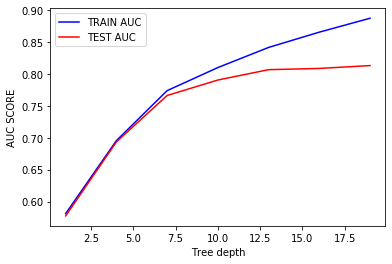

----------------- severe_toxic ------------------


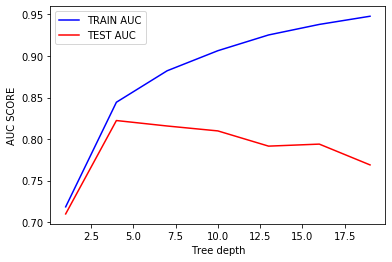

----------------- obscene ------------------


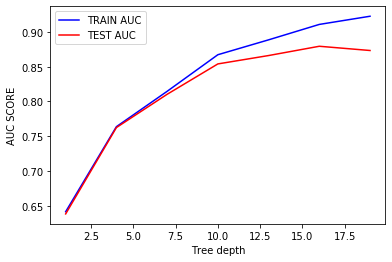

----------------- threat ------------------


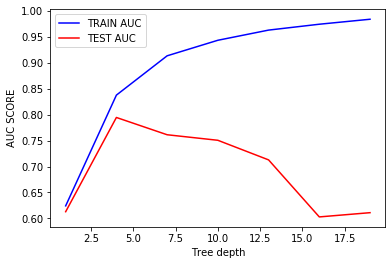

----------------- insult ------------------


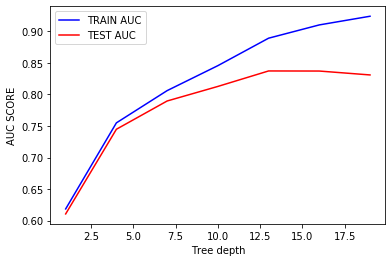

----------------- identity_hate ------------------


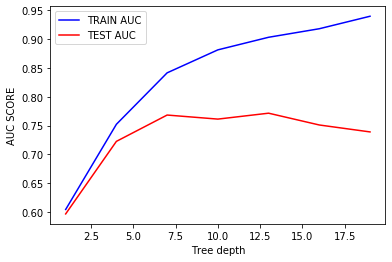

In [6]:
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
scores = []
max_depths = [1,4,7,10,13,16,19]
for name in classes:
    print("-----------------",name, "------------------")
    X_ros, y_ros = ros.fit_resample(train_tfidfmatrix, true_train_labels[name])
    train_results = []
    test_results = []
    for max_depth in max_depths:
        dt = DecisionTreeClassifier(max_depth=max_depth)
        dt.fit(X_ros, y_ros)
        train_pred = dt.predict_proba(X_ros)[:, 1]
        test_pred = dt.predict_proba(validation_tfidfmatrix)[:, 1]
        train_results.append(roc_auc_score(y_ros, train_pred))
        test_results.append(roc_auc_score(true_test_labels[name], test_pred))
    line1, = plt.plot(max_depths, train_results, "b", label= "TRAIN AUC")
    line2, = plt.plot(max_depths, test_results, "r", label= "TEST AUC")
    plt.ylabel("AUC SCORE")
    plt.xlabel("Tree depth")
    plt.legend(handles=[line1, line2])
    plt.show()

### ADABOOSTING

In [7]:
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
scores = []
ros = RandomOverSampler()
for name in classes:
    print("-----------------",name, "------------------")
    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=0)
    X_ros, y_ros = ros.fit_resample(true_train_attributes, true_train_labels[name])
    bdt.fit(X_ros, y_ros)
    y_probs = bdt.predict_proba(true_test_attributes)[:, 1]
    score =roc_auc_score(true_test_labels[name],y_probs)
    scores.append(score)
    print("Class",name, "roc_auc_score:",score)

print('Total roc_auc_score: {}'.format(np.mean(scores)))

----------------- toxic ------------------
Class toxic roc_auc_score: 0.9406670114168945
----------------- severe_toxic ------------------
Class severe_toxic roc_auc_score: 0.976592571817448
----------------- obscene ------------------
Class obscene roc_auc_score: 0.9541089475285589
----------------- threat ------------------
Class threat roc_auc_score: 0.9526625707984475
----------------- insult ------------------
Class insult roc_auc_score: 0.9508293928259576
----------------- identity_hate ------------------
Class identity_hate roc_auc_score: 0.9554600772147159
Total roc_auc_score: 0.955053428600337


In [8]:
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
scores = []
ros = RandomOverSampler()
for name in classes:
    print("-----------------",name, "------------------")
    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=0)
    X_ros, y_ros = ros.fit_resample(train_tfidfmatrix, true_train_labels[name])
    bdt.fit(X_ros, y_ros)
    y_probs = bdt.predict_proba(validation_tfidfmatrix)[:, 1]
    score =roc_auc_score(true_test_labels[name],y_probs)
    scores.append(score)
    print("Class",name, "roc_auc_score:",score)
    print("Most relevant expressions:" )
    A = dict(zip(range(train_tfidfmatrix.shape[1]), bdt.feature_importances_))
    print([tf_dict[i] for i in sorted(A, key=A.get, reverse = True)][:10])

print('Total roc_auc_score: {}'.format(np.mean(scores)))

----------------- toxic ------------------
Class toxic roc_auc_score: 0.908017120023652
Most relevant expressions:
['article', 'as', 'ass', 'asshole', 'at', 'bitch', 'bullshit', 'but', 'crap', 'cunt']
----------------- severe_toxic ------------------
Class severe_toxic roc_auc_score: 0.9525381296453009
Most relevant expressions:
['as', 'fuck', 'are', 'article', 'ass', 'asshole', 'bastard', 'been', 'bitch', 'but']
----------------- obscene ------------------
Class obscene roc_auc_score: 0.9521206914213542
Most relevant expressions:
['fuck', 'as', 'any', 'article', 'ass', 'asshole', 'assholes', 'bastard', 'been', 'bitch']
----------------- threat ------------------
Class threat roc_auc_score: 0.9622756263916609
Most relevant expressions:
['death', 'die', 'will', 'abuse', 'all', 'an', 'article', 'as', 'ass', 'beat']
----------------- insult ------------------
Class insult roc_auc_score: 0.9298543207674337
Most relevant expressions:
['article', 'fuck', 'fucking', 'as', 'ass', 'asshole', 'b